In [1]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from ConeBeamDCCWithBackprojectionPlane import *
from AllAcquisitionClass import *
import time

In [2]:
filesdir_ref = "/home/mmouchet/PycharmProjects/DccOnPhysicalDetectors/paper_dcc_simu/thorax/"
# reading projections
proj = itk.imread(filesdir_ref+"projections_thorax_360_920x1028.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'geometry_thorax_360_920x1028.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 360
itkSize3 ([920, 32, 360])


In [4]:
AcquiDCC = DCCWithBPinAnAcquisition(geometry, proj)
AcquiDCC.ComputeAllPossiblePairs()


88314
44157


0

In [5]:
AcquiDCC.ComputeDCCForAllPairs()

0

In [7]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(AcquiDCC.n_proj))
G.add_weighted_edges_from(AcquiDCC.pairs)
print(G.number_of_nodes(), G.number_of_edges())
length, path = nx.single_source_dijkstra(G, 0)

360 44157


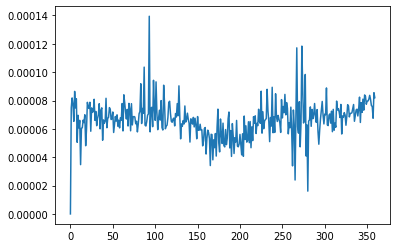

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(AcquiDCC.n_proj),[length[i] for i in range(AcquiDCC.n_proj)])
plt.show()